In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline
import numpy as np

from sklearn.cluster import KMeans

# Example make blobs

In [2]:
centers_neat = [(-10, 10), (0, -5), (10, 5), (5, 25)]

x_neat, y_neat_orig   = datasets.make_blobs(n_samples   = 1000,
                                            centers     = centers_neat,
                                            cluster_std = 2,
                                            random_state= 2)

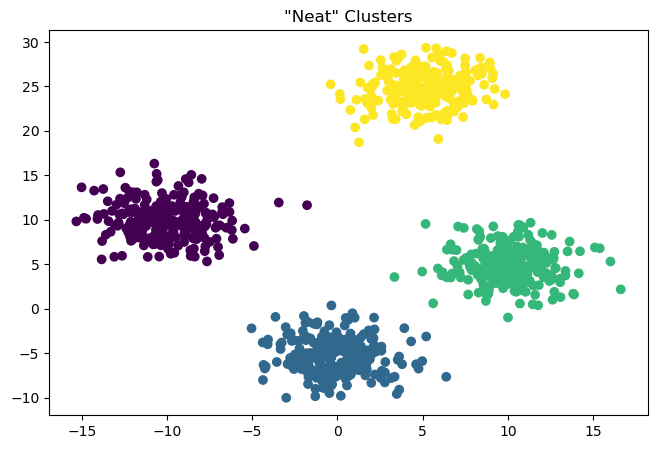

In [3]:
plt.figure(figsize=(17,5))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], 
            x_neat[:,1], 
            c=y_neat_orig, 
);

In [4]:
# Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5), (5, 25)]

x_neat, y_neat_orig   = datasets.make_blobs(n_samples   = 1000,
                                        centers     = centers_neat,
                                        cluster_std = 2,
                                        random_state= 2)

x_messy, y_messy_orig = datasets.make_classification(n_samples=1000,
                                          n_features=10,
                                          n_classes=4,
                                          n_clusters_per_class=1,
                                          class_sep=2,      # play with 1.5 , 4
                                          shuffle=False,
                                          random_state=301)


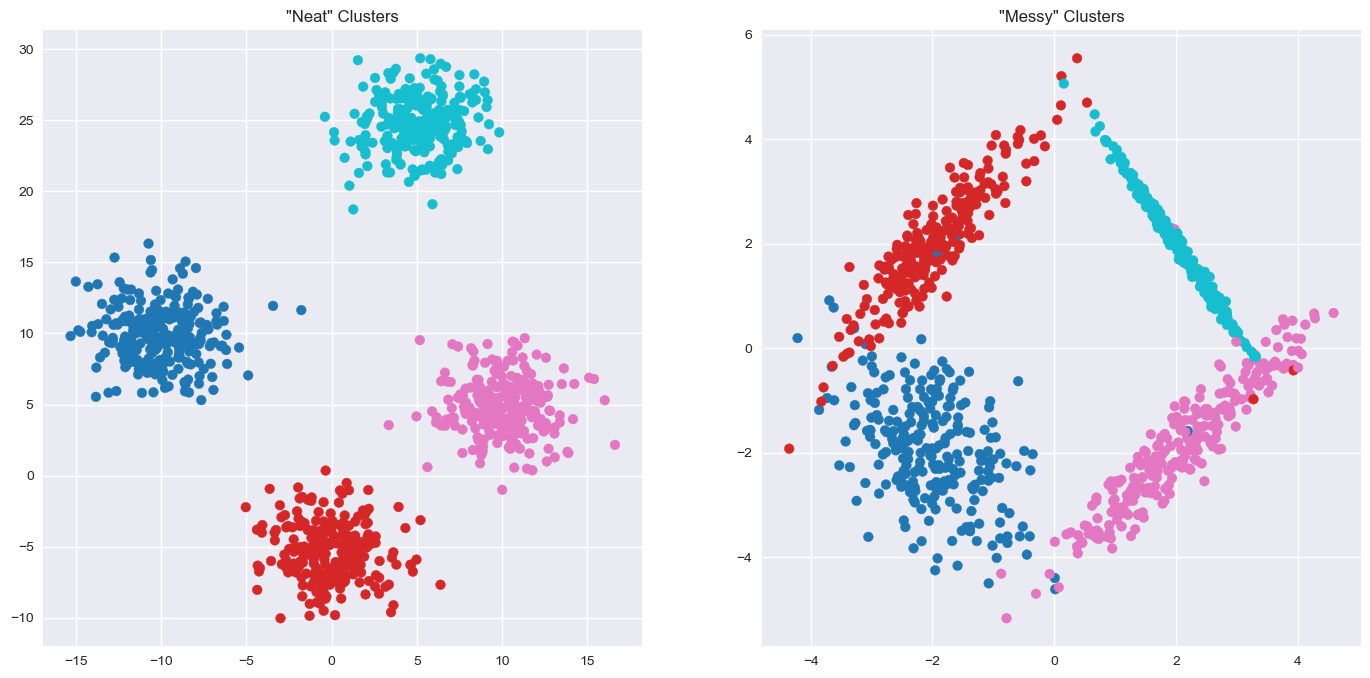

In [5]:
# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], 
            x_neat[:,1], 
            c=y_neat_orig, 
            cmap=cmap)

plt.subplot(122, title='"Messy" Clusters')
plt.scatter(x_messy[:,0], 
            x_messy[:,1],
            c=y_messy_orig,
            cmap=cmap);

#### The data set on the left seems to clearly exhibit 4 well-defined, spherical clusters while the set on the right is hazy. Is it 2 clusters? Maybe 3? 

In [6]:
# Predict K-Means cluster membership
km_neat   = KMeans(n_clusters=4, max_iter=500, random_state=100)
km_messy  = KMeans(n_clusters=4, max_iter=500, random_state=100)

In [8]:
# what happens in the fit stage
# it will find clusters, it will label the clusters 0,1,2... and their centers

km_neat.fit(x_neat)
km_messy.fit(x_messy)

KMeans(max_iter=500, n_clusters=4, random_state=100)

In [9]:
y_neat  = km_neat.predict(x_neat)
y_messy = km_messy.predict(x_messy)

AttributeError: 'NoneType' object has no attribute 'split'

In [9]:
km_neat.cluster_centers_

array([[ 1.00685590e+01,  4.85711177e+00],
       [ 5.14770144e+00,  2.48409884e+01],
       [-1.00313709e+01,  9.96731672e+00],
       [-2.12267052e-02, -5.29751855e+00]])

In [10]:
km_messy.cluster_centers_

array([[-1.95572132,  2.06039874, -0.69124041, -1.6753112 ,  0.00901402,
        -0.11706037, -0.01213284, -0.01281848, -0.04270811, -0.01102888],
       [-2.07388362, -1.90307886, -2.61473211, -0.51948078,  0.02643934,
         0.05363918,  0.00814978, -0.0897566 , -0.05634406,  0.11802264],
       [ 2.24803078,  1.65437027,  2.64625283,  0.68872029,  0.12153286,
         0.05342667,  0.03730741,  0.03481415,  0.02665349, -0.00794726],
       [ 1.73404943, -2.28509423,  0.40196308,  1.62632903, -0.16298122,
        -0.0374626 , -0.03277932, -0.04205342,  0.02062984, -0.02524929]])

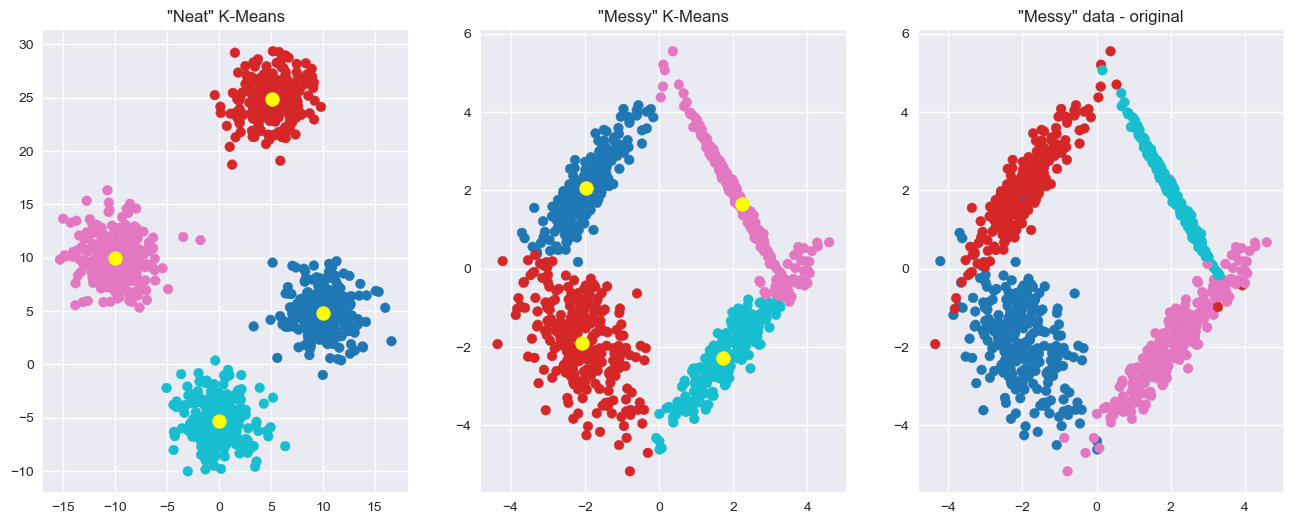

In [11]:
plt.figure(figsize=(16, 6))

plt.subplot(131, title='"Neat" K-Means')

# plot the neat data along with the centers
plt.scatter(x_neat[:,0], 
            x_neat[:,1], 
            c=km_neat.labels_, 
            cmap=cmap)

plt.scatter(km_neat.cluster_centers_[:, 0], 
            km_neat.cluster_centers_[:, 1], 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids')

plt.subplot(132, title='"Messy" K-Means')

# plot the messy along with the centers
plt.scatter(x_messy[:,0], 
            x_messy[:,1], 
            c=km_messy.labels_, 
            cmap=cmap)

plt.scatter(km_messy.cluster_centers_[:,0], 
            km_messy.cluster_centers_[:, 1] , 
            s = 100, 
            c = 'yellow', 
            label = 'Centroids');

plt.subplot(133, title='"Messy" data - original')
plt.scatter(x_messy[:,0], 
            x_messy[:,1],
            c=y_messy_orig,
            cmap=cmap);

__performance on the __
- __"neat"__ data__ set achieves excellent clustering, 
- __"messy"__ data set — while not that bad — is suboptimal. 

- Visually, we can see 2, maybe 3, clusters — but K-means creates partitions that don't particularly reflect that. 

- Our clusters are of varying shapes and variances, which proves challenging for K-means to work with.

- "neat" clusters are composed of data points that are normally distributed and isotropic (i.e., the same variance in all directions) across the 2 D of the plot. 

- "messy" data is normally distributed as well, but not isotropic 
- "anisotropic" 
- Furthermore, the "messy" clusters aren't well separated, so K-means has a hard time judging which centroid each data point is closest to.

#### both data sets are artificially created, which one is more likely real?

''

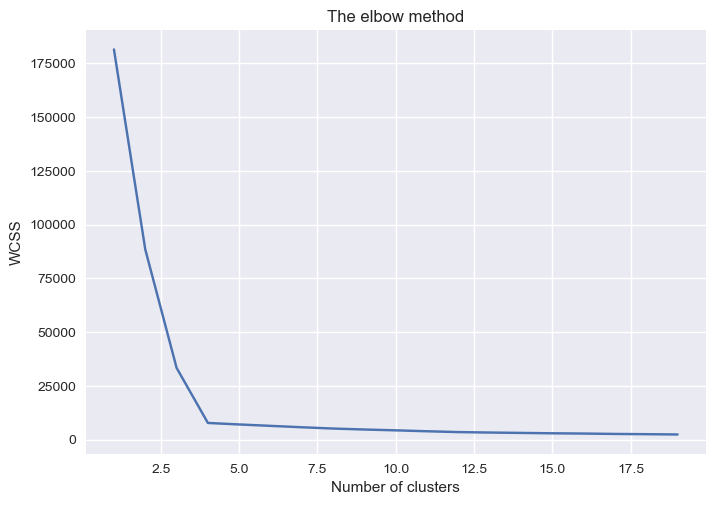

In [13]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

# within-cluster sum of squares (WCSS)
wcss = []

for i in range(1, 20):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_neat)
    
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
;

''

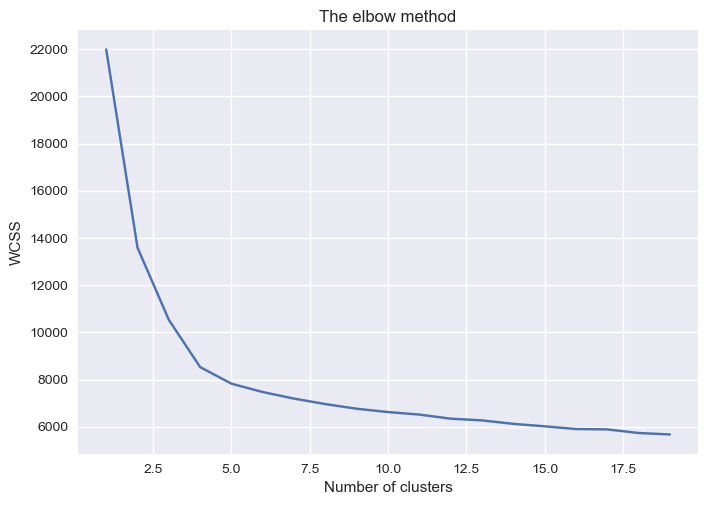

In [14]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

# within-cluster sum of squares (WCSS)
wcss = []

for i in range(1, 20):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_messy)
    
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
;

#### try on credit card data
- expectation is to 2 clusters

In [16]:
import pandas as pd

In [21]:
location = r'D:\AI-DATASETS\02-MISC-large\creditcard.csv'

In [22]:
df_cc = pd.read_csv(location)

In [23]:
df_cc.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
250220,154787.0,2.204173,-0.787689,-1.438079,-0.288461,-0.378818,-0.424498,-0.476624,-0.144315,-0.025785,...,-0.278384,-0.102551,0.099458,0.486182,0.113935,0.714767,-0.054917,-0.066390,1.00,0
64420,51138.0,-1.598985,-1.533041,1.112985,-2.043595,-0.227724,-1.320659,-1.277879,0.530643,-2.336516,...,0.065006,-0.115438,-0.031395,0.034989,-0.240610,-0.367550,0.028261,-0.161273,10.00,0
163284,115818.0,2.136588,-0.666008,-1.266000,-0.679916,-0.532740,-0.536535,-0.919043,-0.069134,0.001314,...,0.239109,0.757250,0.120772,0.514204,-0.118747,-0.112976,0.028348,-0.004176,24.99,0
29047,35295.0,1.213666,0.219618,0.301681,0.587957,-0.417497,-0.775159,-0.097142,0.010750,-0.047909,...,-0.249978,-0.814527,0.131206,0.256797,0.146519,0.081135,-0.034531,0.017992,1.29,0
102521,68237.0,-0.729877,0.915474,1.595328,-0.140881,-0.280736,-0.504917,1.123241,-0.204338,-0.373392,...,-0.244396,-0.429679,0.038931,0.518817,-0.202661,0.018215,0.231447,-0.052564,89.99,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

scaler.fit(df_cc)

StandardScaler()

In [26]:
df_cc_scaled = scaler.transform(df_cc)

Text(0, 0.5, 'WCSS')

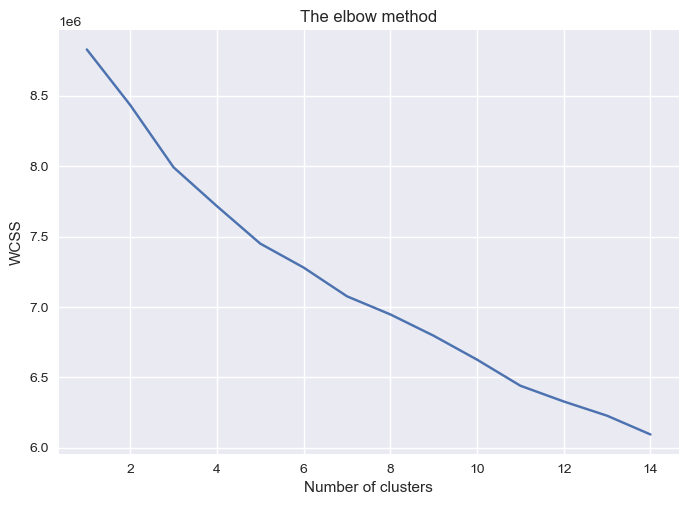

In [29]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

# within-cluster sum of squares (WCSS)
wcss = []

for i in range(1, 15):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(df_cc_scaled)
    
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)
    
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares